# Part 3 - Minimum Spanning Trees

The following code is an implementation of Prim's algorithm to solve the problem posited in the assignment description in Part 3. I also defined a function for Kruskal's algorithm and compared the two in solving the problem, and also when tasked with different sized graphs ranging from sparse to dense. The results of these comparisons will be discussed there. Finally, there is some unit testing for the two functions. Please refer to the included image "graph_and_prims_algorithm_in_paper.png" to see the hand-drawn graph and resulting MST from using Prim's.

## Eight Small Islands

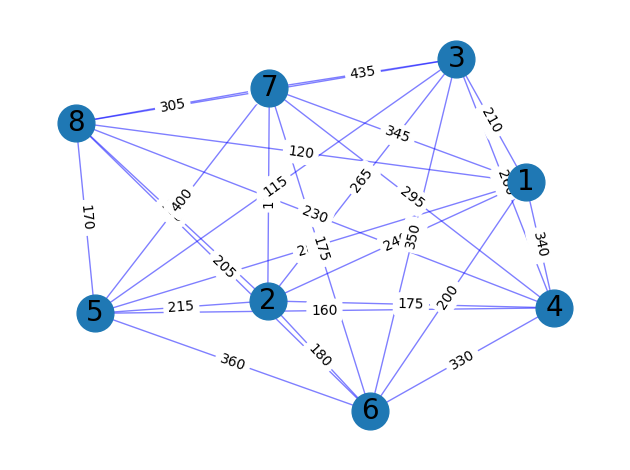

In [71]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt
import random
import time
import unittest


G = nx.Graph()
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')
G.add_node('7')
G.add_node('8')

G.add_edge('1', '2', weight='240')
G.add_edge('1', '3', weight='210')
G.add_edge('1', '4', weight='340')
G.add_edge('1', '5', weight='280')
G.add_edge('1', '6', weight='200')
G.add_edge('1', '7', weight='345')
G.add_edge('1', '8', weight='120')
G.add_edge('2', '3', weight='265')
G.add_edge('2', '4', weight='175')
G.add_edge('2', '5', weight='215')
G.add_edge('2', '6', weight='180')
G.add_edge('2', '7', weight='185')
G.add_edge('2', '8', weight='155')
G.add_edge('3', '4', weight='260')
G.add_edge('3', '5', weight='115')
G.add_edge('3', '6', weight='350')
G.add_edge('3', '7', weight='435')
G.add_edge('3', '8', weight='195')
G.add_edge('4', '5', weight='160')
G.add_edge('4', '6', weight='330')
G.add_edge('4', '7', weight='295')
G.add_edge('4', '8', weight='230')
G.add_edge('5', '6', weight='360')
G.add_edge('5', '7', weight='400')
G.add_edge('5', '8', weight='170')
G.add_edge('6', '7', weight='175')
G.add_edge('6', '8', weight='205')
G.add_edge('7', '8', weight='305')


pos = nx.spring_layout(G, k=0.85, seed=1)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="b")
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## Prim's Algorithm

Prim's MST as a list (starting node, destination node, distance): [('1', '8', '120'), ('8', '2', '155'), ('8', '5', '170'), ('5', '3', '115'), ('5', '4', '160'), ('2', '6', '180'), ('6', '7', '175')]


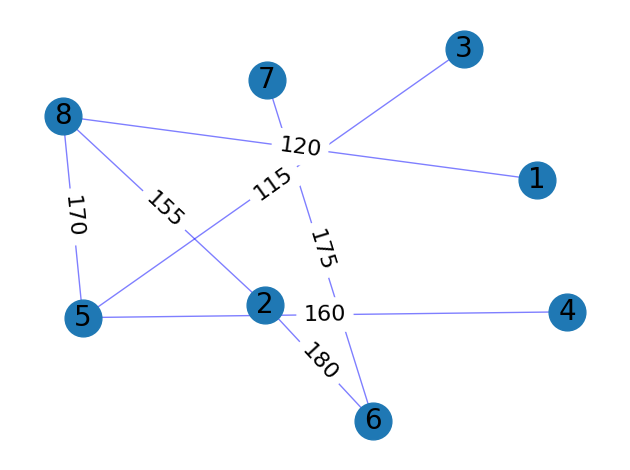

In [72]:
def prim(G):
    T = nx.Graph()
    visited = set()
    start_node = list(G.nodes())[0] 

    # Add starting node to visited set
    visited.add(start_node)

    # Initialize priority queue with the edges from starting node
    pq = []
    for edge in G.edges(start_node, data=True):
        heapq.heappush(pq, (edge[2]['weight'], start_node, edge[1]))

    # To print MST as list
    mst = []

    while pq:
        # Pop edge with lowest weight
        weight, source, dest = heapq.heappop(pq)

        if dest in visited:
            continue

        T.add_edge(source, dest, weight=weight)
        visited.add(dest)
        mst.append((source, dest, weight))

        for edge in G.edges(dest, data=True):
            if edge[1] not in visited:
                heapq.heappush(pq, (edge[2]['weight'], dest, edge[1]))

    print("Prim's MST as a list (starting node, destination node, distance):", mst)
    return T


T = prim(G)

pos = nx.spring_layout(G, k=0.85, seed=1) 
nx.draw_networkx_nodes(G, pos, node_size=700) 
nx.draw_networkx_edges(T, pos, alpha=0.5, edge_color="b")
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif") 
edge_labels = nx.get_edge_attributes(T, "weight")
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=16)
plt.axis("off")
plt.tight_layout()
plt.show()

## Kruskal's Algorithm

Kruskal's MST as a list (starting node, destination node, distance): [('3', '5', '115'), ('1', '8', '120'), ('2', '8', '155'), ('4', '5', '160'), ('5', '8', '170'), ('6', '7', '175'), ('2', '6', '180')]


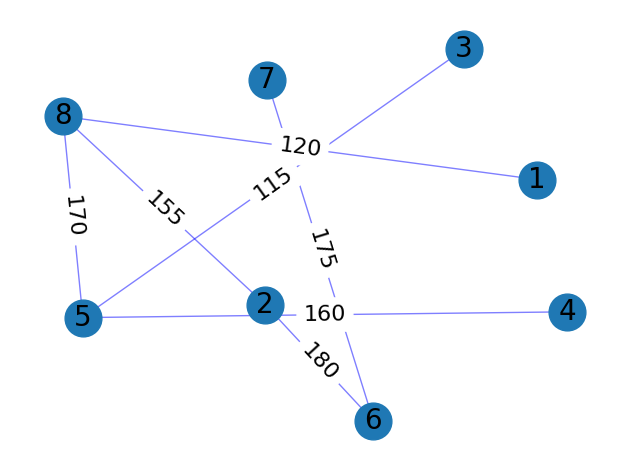

In [73]:
def kruskal(G):
    T = nx.Graph()

    # Sort the edges by weight
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])

    # Create a union-find data structure to keep track of connected components
    uf = nx.utils.union_find.UnionFind(G.nodes())

    # To print MST as list
    mst = []

    for edge in edges:
        source = edge[0]
        dest = edge[1]

        if uf[source] == uf[dest]:
            continue

        T.add_edge(source, dest, weight=edge[2]['weight'])
        uf.union(source, dest)
        mst.append((source, dest, edge[2]['weight']))

    print("Kruskal's MST as a list (starting node, destination node, distance):", mst)
    return T


T = kruskal(G)

pos = nx.spring_layout(G, k=0.85, seed=1) 
nx.draw_networkx_nodes(G, pos, node_size=700) 
nx.draw_networkx_edges(T, pos, alpha=0.5, edge_color="b") 
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(T, "weight") 
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=16) 
plt.axis("off")
plt.tight_layout()
plt.show()

As per above, the path of the MST that the Prim's and Kruskal's functions produce do differ, but the resulting MST remains the same.

## Comparing Performance of Prim's and Kruskal's

In [78]:
# Create new sparse graph
G_sparse = nx.connected_watts_strogatz_graph(n=500, k=4, p=0.1)

for (u, v) in G_sparse.edges():
    G_sparse[u][v]['weight'] = random.randint(1, 500)

# Create new dense graph
G_dense = nx.dense_gnm_random_graph(n=100, m=100000)

for (u, v) in G_dense.edges():
    G_dense[u][v]['weight'] = random.randint(1, 500)


# Function to test average runtimes of the algorithms on different graphs
def avg_runtimes(f, G): 
    avg_runtime = 0
    for i in range(10):
        start_time = time.time()
        f(G)
        end_time = time.time()
        runtime = end_time - start_time
        avg_runtime += runtime
    print("")
    avg_runtime /= 10
    return avg_runtime


# Testing Prim's on 8 small islands problem
print(f"Average runtime of Prim's on 8 small islands graph: {avg_runtimes(prim, G) * 1000} milliseconds")
print("")

# Testing Kruskal's on 8 small islands problem
print(f"Average runtime of Kruskal's on 8 small islands graph: {avg_runtimes(kruskal, G) * 1000} milliseconds")
print("")

# Testing Prim's on sparse graph
print(f"Average runtime of Prim's on sparse graph: {avg_runtimes(prim, G_sparse) * 1000} milliseconds")
print("")

# Testing Kruskal's on sparse graph
print(f"Average runtime of Kruskals's on sparse graph: {avg_runtimes(kruskal, G_sparse) * 1000} milliseconds")
print("")

# Testing Prim's on dense graph
print(f"Average runtime of Prim's on dense graph: {avg_runtimes(prim, G_dense) * 1000} milliseconds")
print("")

# Testing Kruskal's on dense graph
print(f"Average runtime of Kruskals's on dense graph: {avg_runtimes(kruskal, G_dense) * 1000} milliseconds")
print("")


Prim's MST as a list (starting node, destination node, distance): [('1', '8', '120'), ('8', '2', '155'), ('8', '5', '170'), ('5', '3', '115'), ('5', '4', '160'), ('2', '6', '180'), ('6', '7', '175')]
Prim's MST as a list (starting node, destination node, distance): [('1', '8', '120'), ('8', '2', '155'), ('8', '5', '170'), ('5', '3', '115'), ('5', '4', '160'), ('2', '6', '180'), ('6', '7', '175')]
Prim's MST as a list (starting node, destination node, distance): [('1', '8', '120'), ('8', '2', '155'), ('8', '5', '170'), ('5', '3', '115'), ('5', '4', '160'), ('2', '6', '180'), ('6', '7', '175')]
Prim's MST as a list (starting node, destination node, distance): [('1', '8', '120'), ('8', '2', '155'), ('8', '5', '170'), ('5', '3', '115'), ('5', '4', '160'), ('2', '6', '180'), ('6', '7', '175')]
Prim's MST as a list (starting node, destination node, distance): [('1', '8', '120'), ('8', '2', '155'), ('8', '5', '170'), ('5', '3', '115'), ('5', '4', '160'), ('2', '6', '180'), ('6', '7', '175')]


According to Geeks for Geeks (https://www.geeksforgeeks.org/difference-between-prims-and-kruskals-algorithm-for-mst/), one of the main differences between Prim's and Kruskal's algorithms is that Prim's is expected to perform better with dense graphs, while Kruskal's is expected to perform better with sparse graphs, in part because Kruskal's sorts all of the edges of the graph first. 

The results of the above tests are therefore mostly as expected. Prim's consistently outperforms Kruskal's in finding the MST for the dense graph. They are more closely matched with the sparse graph, however. In my testing, sometimes Kruskal's outperforms Prim's, and sometimes Prim's outperforms Kruskal's. This could be as a result of the performance of my own machine, or the specific characteristics of the sparse graph. With the original graph G that maps out the 8 small islands problem (a sparse graph), Prim's tends to marginally outpeform Kruskal's by microseconds.

## Unit Testing

In [75]:
class TestMinimumSpanningTreeFunctions(unittest.TestCase):
    G = nx.Graph()
    G.add_weighted_edges_from([(1, 2, 6), (1, 3, 3), (1, 4, 2), (2, 3, 1), (2, 4, 10), (3, 4, 4)])

    def test_prim(self):
        T = prim(self.G)
        expected_edges = [(1, 4, 2), (1, 3, 3), (3, 2, 1)]
        expected_T = nx.Graph()
        expected_T.add_weighted_edges_from(expected_edges)
        self.assertEqual(sorted(T.edges(data=True)), sorted(expected_T.edges(data=True)))

    def test_kruskal(self):
        T = kruskal(self.G)
        expected_edges = [(2, 3, 1), (3, 1, 3), (1, 4, 2)]
        expected_T = nx.Graph()
        expected_T.add_weighted_edges_from(expected_edges)
        self.assertEqual(sorted(T.edges(data=True)), sorted(expected_T.edges(data=True)))


mst_test_suite = unittest.TestLoader().loadTestsFromTestCase(TestMinimumSpanningTreeFunctions)
unittest.TextTestRunner().run(mst_test_suite)


..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


Kruskal's MST as a list (starting node, destination node, distance): [(2, 3, 1), (1, 4, 2), (1, 3, 3)]
Prim's MST as a list (starting node, destination node, distance): [(1, 4, 2), (1, 3, 3), (3, 2, 1)]


<unittest.runner.TextTestResult run=2 errors=0 failures=0>